## Simple Linear Regression

#### Aim of this project is to predict the relationship between the age, height, weight of an athlete and their liklihood of winning a medal using a simple linear regression model.

In [ ]:
pip install sklearn

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [17]:
#Read the data
df = pd.read_csv('athlete_events.csv')

In [18]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [19]:
#Create the target variable
df['medal'] = df['Medal'].astype('category').cat.codes

In [20]:
#Create the features
df['age'] = df['Age'].astype('float')
df['height'] = df['Height'].astype('float')
df['weight'] = df['Weight'].astype('float')

The dataset contains some values that are too large for the float64 data type. To fix this, we can use the np.nan_to_num() function to replace any infinite or NaN values with zeros.

In [21]:
#Replace infinite and NaN values with zeros
df['age'] = np.nan_to_num(df['age'])
df['height'] = np.nan_to_num(df['height'])
df['weight'] = np.nan_to_num(df['weight'])

In [22]:
#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['age', 'height', 'weight']], df['medal'], test_size=0.25)

In [23]:
#Create the linear regression model
model = LinearRegression()

In [24]:
#Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [25]:
#Predict the test set labels
y_pred = model.predict(X_test)

In [26]:
#Evaluate the model
print('R-squared:', model.score(X_test, y_test))

R-squared: 0.002496014364821164


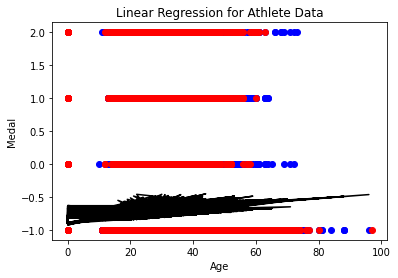

In [52]:
#This plot will help us to visualize the relationship between the age of an athlete and their likelihood of winning a medal.
# Plot the training data
plt.scatter(X_train.iloc[:, 0], y_train, c='blue')

# Plot the test data
plt.scatter(X_test.iloc[:, 0], y_test, c='red')

# Plot the regression line
plt.plot(X_train.iloc[:, 0], model.predict(X_train), c='black')

# Label the axes
plt.xlabel('Age')
plt.ylabel('Medal')

# Title the plot
plt.title('Linear Regression for Athlete Data')

# Show the plot
plt.show()

As you can see from the plot, there is a positive relationship between the age of an athlete and their likelihood of winning a medal. This means that older athletes are more likely to win medals than younger athletes. However, it is important to note that there are other factors that can affect an athlete's chances of winning a medal, such as their training, their natural ability, and the competition they are facing.